Medical Insurance Price Prediction using Machine Learning – Python

You must have heard some advertisements regarding medical insurance that promises to help financially in case of any medical emergency. One who purchases this type of insurance has to pay premiums monthly and this premium amount varies vastly depending upon various factors. 

we will try to extract some insights from a dataset that contains details about the background of a person who is purchasing medical insurance along with what amount of premium is charged to those individuals as well using Machine Learning in Python.

Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv(r"C:\Users\rajni\Downloads\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This dataset contains 1338 data points with 6 independent features and 1 target feature(charges).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above, we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Exploratory Data Analysis

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

so, here we can conclude that there are no null values in the dataset given.

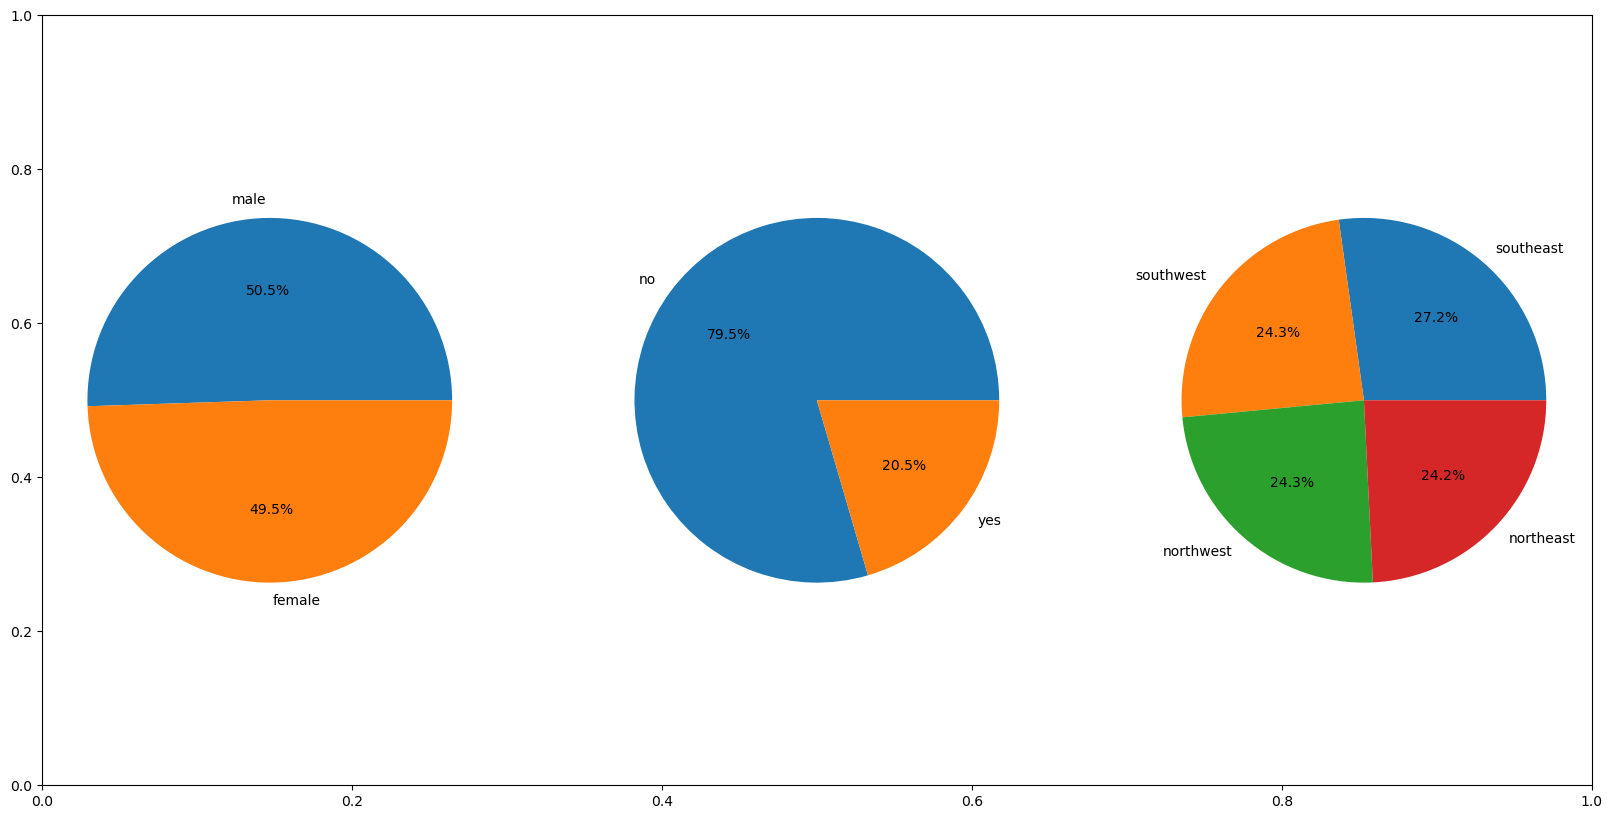

In [13]:
import matplotlib.pyplot as plt
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

# This code is modified by Susobhan Akhuli

Pie chart for the sex, smoker, and region column

The data provided to us is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 80:20.


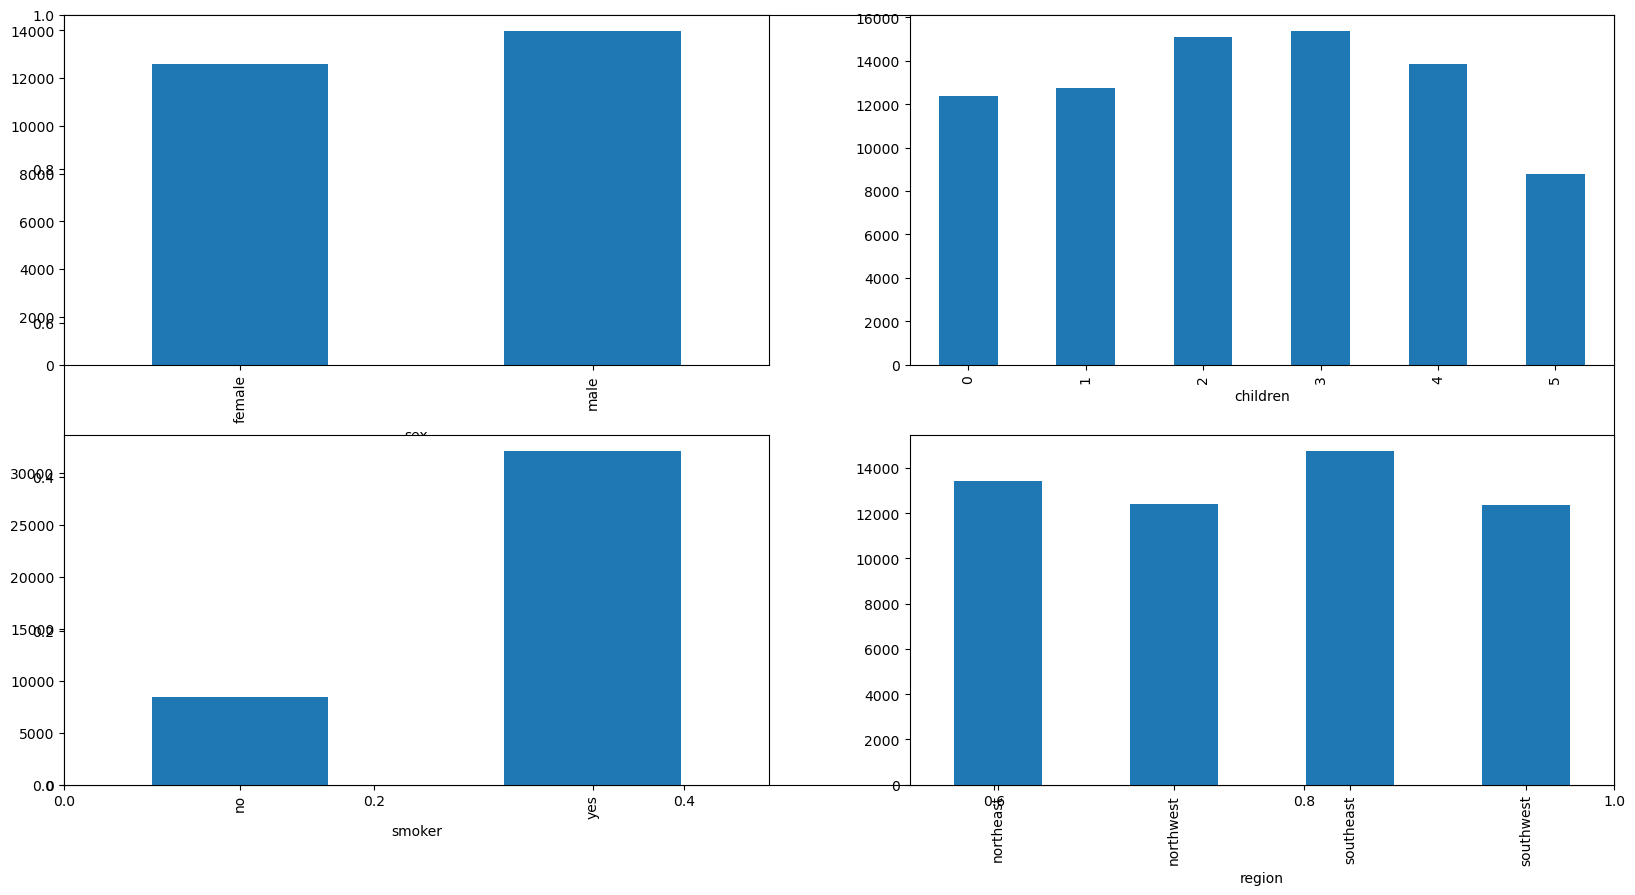

In [15]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

# This code is modified by Susobhan Akhuli

Now let’s look at some of the observations which are shown in the above graphs:

Charges are on the higher side for males as compared to females but the difference is not that much.
Premium charged from the smoker is around thrice that which is charged from non-smokers.
Charges are approximately the same in the given four regions.


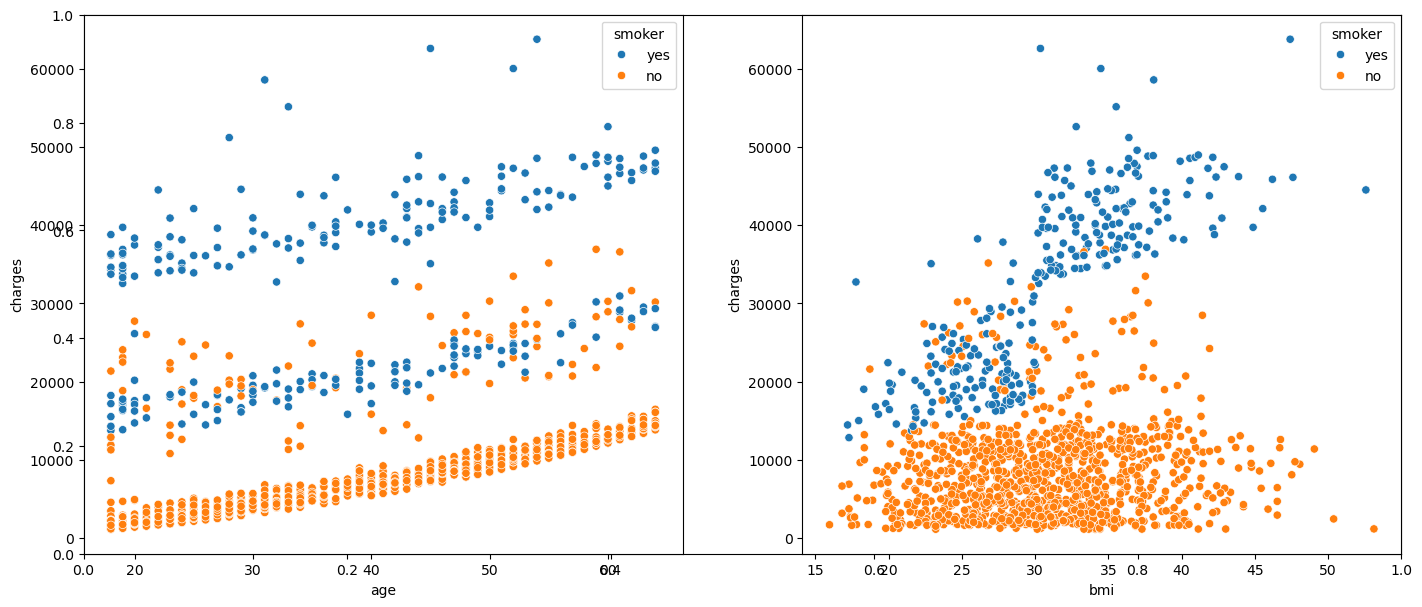

In [17]:
import seaborn as sns

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()


A clear distinction can be observed here between the charges that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.

DATA PREPROCESSING

<Axes: ylabel='age'>

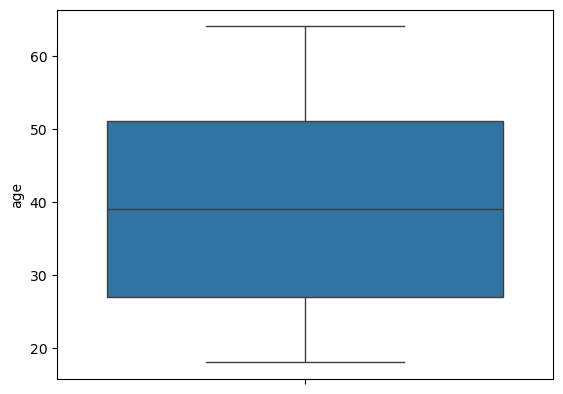

In [19]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

we can see that there are no outliers present in age column

<Axes: ylabel='bmi'>

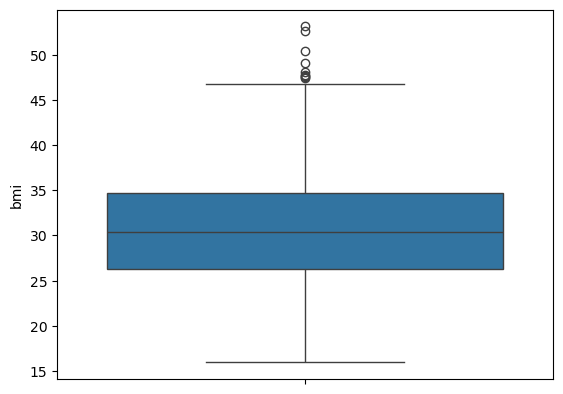

In [21]:
sns.boxplot(df['bmi'])

Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [23]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


Defaulting to user installation because normal site-packages is not writeable


<Axes: ylabel='bmi'>

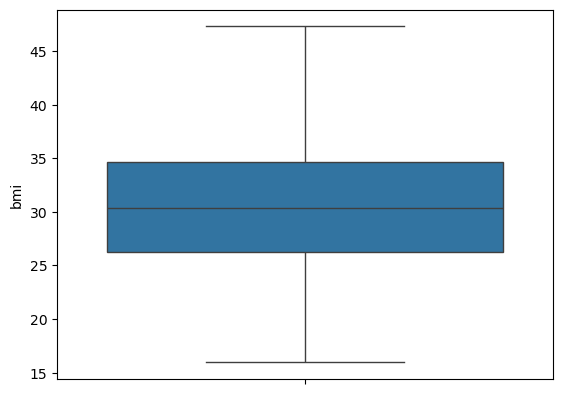

In [25]:
!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])


Now we successfully treated the outliers


Data Wrangling

Data wrangling is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.

In [31]:
df['age'].skew()

0.054780773126998195

In [33]:
df['bmi'].skew()

0.23289153320569975

Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

Encoding

encoding is to be done for discrete categorical data (sex,bmi,region).

In [35]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

Now the discrete data is encoded and the data preprocessing and data wrangling part is completed.Now we can go for model development.

In [37]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


Model Development
There are so many state-of-the-art ML models available in academia but some model fits better to some problem while some fit better than other. So, to make this decision we split our data into training and validation data. Then we use the validation data to choose the model with the highest performance.

In [55]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)
 df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
 df1


After dividing the data into training and validation data it is considered a better practice to achieve stable and fast training of the model.We have identified the best random_state number for this data set as 42 .Now we fix this random_state and try with different ml algorithms for better score or accuracy.

Now let’s train some state-of-the-art machine learning models on the training data and then use the validation data for choosing the best out of them for prediction.


In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

0.7295415541376447
0.8062391115570589
0.7470697972809902


In [51]:
from sklearn.metrics import r2_score


In [57]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Predictions
ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)

# R^2 Scores
print(r2_score(ytrain, ypredtrain2))
print(r2_score(ytest, ypredtest2))

# Cross-Validation
print(cross_val_score(rfmodel, X, Y, cv=5).mean())


0.9460049714628977
0.96948902620088
0.8363637309718952


In [59]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

0.9762925493818944
0.8535472723881479
0.8363637309718952
{'n_estimators': 50}
0.9761323797173371
0.8545057576175925
0.8367438097052858


In [61]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

0.8988766039341503
0.8639977100259015
0.8550927404604826
{'learning_rate': 0.19, 'n_estimators': 21}
0.8783055364436517
0.867455976392318
0.8606041910125791


In [63]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.9945629835128784
0.8017688393592834
0.8081253051757813
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8808107376098633
0.8636956810951233
0.8607115387916565


Comapring All Models

LinearRegression

0.729

0.806

0.747

Model

Train Accuracy

Test Accuracy

CV Score

SupportVectorMachine

-0.105

-0.134

0.103

RandomForest

0.974

0.882

0.836

GradientBoost

0.868

0.901

0.860

XGBoost

0.870

0.904

0.860

From the above table we can observe that XGBoost is the best model.Now we need to identify the important features for predicting of charges.

In [65]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.038291
sex,0.003500
bmi,0.107480
children,0.011483
smoker,0.834993
region,0.004254


In [67]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.038291
bmi,0.107480
children,0.011483
smoker,0.834993


Final Model:

In [69]:
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())

0.8691051602363586
0.9007425308227539
0.8606266975402832


Final Model:
Train accuracy : 0.870691899927822
Test accuracy   : 0.904151903449132
CV Score            : 0.8600710679082143

Save Model:

In [71]:
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))

Predict on new data:

In [73]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([18035.828], dtype=float32)

Conclusion
Out of all the models XGBoost model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.

The dataset we have used here was small still the conclusion we drew from them were quite similar to what is observed in the real-life scenario. If we would have a bigger dataset then we will be able to learn even deeper patterns in the relation between the independent features and the premium charged from the buyers.